In [5]:
import os
import aeon
import time
from aeon.classification.distance_based import KNeighborsTimeSeriesClassifier
from sktime.classification.interval_based import TimeSeriesForestClassifier
from aeon.datasets import load_from_ts_file
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report,make_scorer
import matplotlib.pyplot as plt
from joblib import dump, load
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV

# Load Dataset

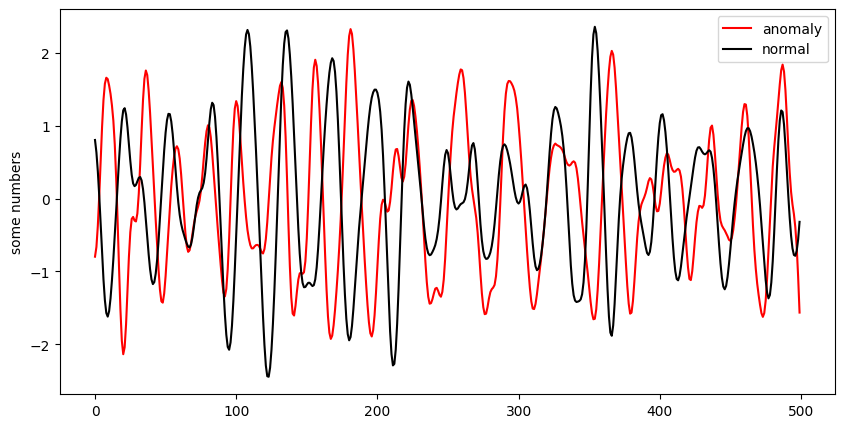

In [6]:
XA, yA = load_from_ts_file("FordA_TRAIN.ts")

X_train, y_train = load_from_ts_file("FordA_TRAIN.ts")
X_test, y_test = load_from_ts_file("FordA_TEST.ts")


plt.figure(figsize=(10, 5))

for i in range(0,2):
    color = 'red' if yA[i] == "-1" else 'black'
    plt.plot(XA[i][0],color=color)

plt.legend(["anomaly","normal"])
plt.ylabel('some numbers')
plt.show()


# Time Series Forest Classifier

In [7]:
start_time = time.time() #Timer

tsf_classifier = TimeSeriesForestClassifier(random_state=42)

# Hyperparameters to tune
param_grid = {
    "n_estimators": [50, 100, 200],  # Number of trees in the forest
    "min_interval": [5, 10, 20],  # Minimum length of intervals
}

grid_search = GridSearchCV(
    estimator=tsf_classifier,
    param_grid=param_grid,
    cv=10,
    scoring="accuracy", 
    n_jobs=-1,
)

# Fit the model with grid search for the selected hyperparameters
grid_search.fit(X_train, y_train)

end_time = time.time() 
total_time = end_time - start_time #Total time

print(f"\nTotal execution time of GridSearchCV: {total_time:.2f} seconds")

print("Best hyperparameters:", grid_search.best_params_)
print("Best Accuracy (average across 10 k-folds):", grid_search.best_score_)

cv_results = pd.DataFrame(grid_search.cv_results_)
print("\nDetailed cross-validation results (mean and standard deviation):")
print(cv_results[['mean_test_score', 'std_test_score', 'params']])

# Use the best model
best_model_tsf = grid_search.best_estimator_

# Predictions on test set
y_pred = best_model_tsf.predict(X_test)

# Metrics
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

print("\nEvaluation on the test set:")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

# Save the model
dump(best_model_tsf, "tsf_classifier_model.joblib")


Tiempo total de ejecución de GridSearchCV: 786.67 segundos
Mejores hiperparámetros: {'min_interval': 5, 'n_estimators': 200}
Mejor Accuracy (promedio en los 10 k-folds): 0.7995021545090797

Resultados detallados de validación cruzada (media y desviación estándar):
   mean_test_score  std_test_score                                     params
0         0.760893        0.024883    {'min_interval': 5, 'n_estimators': 50}
1         0.790611        0.018463   {'min_interval': 5, 'n_estimators': 100}
2         0.799502        0.019885   {'min_interval': 5, 'n_estimators': 200}
3         0.759791        0.023121   {'min_interval': 10, 'n_estimators': 50}
4         0.784775        0.018876  {'min_interval': 10, 'n_estimators': 100}
5         0.799228        0.024638  {'min_interval': 10, 'n_estimators': 200}
6         0.768955        0.019009   {'min_interval': 20, 'n_estimators': 50}
7         0.787552        0.016341  {'min_interval': 20, 'n_estimators': 100}
8         0.796167        0.0207

['tsf_classifier_model.joblib']

# KNN Derivative Transform Distance DTDW


In [8]:
start_time = time.time()

knn_classifier_der = KNeighborsTimeSeriesClassifier(n_jobs=-1)

# Hyperparameters to tune
param_grid_der = {
    "n_neighbors": [10, 20, 50],  # Test different numbers of neighbors
    "distance": ["ddtw"],  # Test different distance metrics
    "weights": ["uniform", "distance"],  # Weight neighbors
}

grid_search_der = GridSearchCV(
    estimator=knn_classifier_der,
    param_grid=param_grid_der,
    cv=10,
    scoring="accuracy", 
    n_jobs=-1,
)

# Fit the model with grid search for the selected hyperparameters
grid_search_der.fit(X_train, y_train)

end_time = time.time()
total_time = end_time - start_time
print(f"\nTotal execution time of GridSearchCV: {total_time:.2f} seconds")

print("Best hyperparameters:", grid_search_der.best_params_)
print("Best Accuracy (average across 10 k-folds):", grid_search_der.best_score_)

cv_results_der = pd.DataFrame(grid_search_der.cv_results_)
print("\nDetailed cross-validation results (mean and standard deviation):")
print(cv_results_der[['mean_test_score', 'std_test_score', 'params']])

# Use the best model
best_model_der = grid_search_der.best_estimator_

# Predictions on test set
y_pred_der = best_model_der.predict(X_test)

# Metrics
precision_der = precision_score(y_test, y_pred_der, average="weighted")
recall_der = recall_score(y_test, y_pred_der, average="weighted")
accuracy_der = accuracy_score(y_test, y_pred_der)
f1_der = f1_score(y_test, y_pred_der, average="weighted")

print("\nEvaluation on the test set:")
print(f"Precision: {precision_der}")
print(f"Recall: {recall_der}")
print(f"Accuracy: {accuracy_der}")
print(f"F1 Score: {f1_der}")

# Save the model
dump(best_model_der, "knn_der_classifier_model.joblib")



Tiempo total de ejecución de GridSearchCV: 51900.95 segundos
Mejores hiperparámetros: {'distance': 'ddtw', 'n_neighbors': 10, 'weights': 'distance'}
Mejor Accuracy (promedio en los 10 k-folds): 0.72257540781779

Resultados detallados de validación cruzada (media y desviación estándar):
   mean_test_score  std_test_score  \
0         0.715355        0.015264   
1         0.722575        0.017524   
2         0.714801        0.019809   
3         0.718690        0.021513   
4         0.710631        0.012013   
5         0.714520        0.014171   

                                              params  
0  {'distance': 'ddtw', 'n_neighbors': 10, 'weigh...  
1  {'distance': 'ddtw', 'n_neighbors': 10, 'weigh...  
2  {'distance': 'ddtw', 'n_neighbors': 20, 'weigh...  
3  {'distance': 'ddtw', 'n_neighbors': 20, 'weigh...  
4  {'distance': 'ddtw', 'n_neighbors': 50, 'weigh...  
5  {'distance': 'ddtw', 'n_neighbors': 50, 'weigh...  


KeyboardInterrupt: 